# Analyse des causes d'attrition chez TechNova Partners
# Étape 1 : Analyse Exploratoire des Données

**Objectif** : Identifier les différences clés entre les employés ayant quitté l'entreprise et ceux qui y sont encore.

## 1. Importation des bibliothèques

In [1]:
# Manipulation de données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Bibliothèques importées avec succès")

✅ Bibliothèques importées avec succès


## 2. Chargement des 3 fichiers de données

In [2]:
# Chargement des fichiers CSV
df_sirh = pd.read_csv('extrait_sirh.csv')
df_eval = pd.read_csv('extrait_eval.csv')
df_sondage = pd.read_csv('extrait_sondage.csv')

print("📊 Fichiers chargés avec succès :")
print(f"  - SIRH : {df_sirh.shape[0]} lignes, {df_sirh.shape[1]} colonnes")
print(f"  - Évaluations : {df_eval.shape[0]} lignes, {df_eval.shape[1]} colonnes")
print(f"  - Sondage : {df_sondage.shape[0]} lignes, {df_sondage.shape[1]} colonnes")

📊 Fichiers chargés avec succès :
  - SIRH : 1470 lignes, 12 colonnes
  - Évaluations : 1470 lignes, 10 colonnes
  - Sondage : 1470 lignes, 12 colonnes


## 3. Premier aperçu de chaque fichier

### 3.1 Fichier SIRH (Système d'Information des Ressources Humaines)

In [3]:
print("📋 Structure du fichier SIRH :")
print("\nColonnes :")
print(df_sirh.columns.tolist())
print("\nPremières lignes :")
df_sirh.head()

📋 Structure du fichier SIRH :

Colonnes :
['id_employee', 'age', 'genre', 'revenu_mensuel', 'statut_marital', 'departement', 'poste', 'nombre_experiences_precedentes', 'nombre_heures_travailless', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel']

Premières lignes :


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2


In [4]:
print("📊 Informations sur le fichier SIRH :")
df_sirh.info()

📊 Informations sur le fichier SIRH :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8)

In [5]:
print("liste des catégories de SIRH:")
print(df_sirh['genre'].unique())
print(df_sirh['statut_marital'].unique())
print(df_sirh['departement'].unique())
print(df_sirh['poste'].unique())

liste des catégories de SIRH:
['F' 'M']
['Célibataire' 'Marié(e)' 'Divorcé(e)']
['Commercial' 'Consulting' 'Ressources Humaines']
['Cadre Commercial' 'Assistant de Direction' 'Consultant' 'Tech Lead'
 'Manager' 'Senior Manager' 'Représentant Commercial'
 'Directeur Technique' 'Ressources Humaines']


### 3.2 Fichier Évaluations

In [6]:
print("📋 Structure du fichier Évaluations :")
print("\nColonnes :")
print(df_eval.columns.tolist())
print("\nPremières lignes :")
df_eval.head()

📋 Structure du fichier Évaluations :

Colonnes :
['satisfaction_employee_environnement', 'note_evaluation_precedente', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'eval_number', 'note_evaluation_actuelle', 'heure_supplementaires', 'augementation_salaire_precedente']

Premières lignes :


,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,Oui,11 %
1,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,2,1,3,2,3,E_4,3,Oui,15 %
3,4,3,1,3,3,3,E_5,3,Oui,11 %
4,1,3,1,2,4,3,E_7,3,Non,12 %


In [7]:
print("📊 Informations sur le fichier Évaluations :")
df_eval.info()

📊 Informations sur le fichier Évaluations :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   obje

In [8]:
print("liste des catégories :")
print(df_eval['eval_number'].unique())
print(df_eval['heure_supplementaires'].unique())
print(df_eval['augementation_salaire_precedente'].unique())

liste des catégories :
['E_1' 'E_2' 'E_4' ... 'E_2064' 'E_2065' 'E_2068']
['Oui' 'Non']
['11 %' '23 %' '15 %' '12 %' '13 %' '20 %' '22 %' '21 %' '17 %' '14 %'
 '16 %' '18 %' '19 %' '24 %' '25 %']


### 3.3 Fichier Sondage (avec variable cible)

In [9]:
print("📋 Structure du fichier Sondage :")
print("\nColonnes :")
print(df_sondage.columns.tolist())
print("\nPremières lignes :")
df_sondage.head()

📋 Structure du fichier Sondage :

Colonnes :
['a_quitte_l_entreprise', 'nombre_participation_pee', 'nb_formations_suivies', 'nombre_employee_sous_responsabilite', 'code_sondage', 'distance_domicile_travail', 'niveau_education', 'domaine_etude', 'ayant_enfants', 'frequence_deplacement', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel']

Premières lignes :


,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,Non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,Non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2


In [10]:
print("📊 Informations sur le fichier Sondage :")
df_sondage.info()

📊 Informations sur le fichier Sondage :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  ann

In [11]:
print("liste des catégories :")
print(df_sondage['domaine_etude'].unique())
print(df_sondage['a_quitte_l_entreprise'].unique())
print(df_sondage['ayant_enfants'].unique())
print(df_sondage['frequence_deplacement'].unique())

liste des catégories :
['Infra & Cloud' 'Autre' 'Transformation Digitale' 'Marketing'
 'Entrepreunariat' 'Ressources Humaines']
['Oui' 'Non']
['Y']
['Occasionnel' 'Frequent' 'Aucun']


---
## 4.Identification et nettoyage des colonnes

**Objectif :** Identifier les variables quantitatives et qualitatives, et nettoyer les données si nécessaire.
Variable qualitative pouvant etre converties en quantitative 'eval_number' et ' augmentation_salaire', distribution de 'ayant_enfants'

### 4.1 Nettoyage nécessaire : Variable 'augementation_salaire_precedente'

In [12]:
# Examiner la colonne augementation_salaire_precedente
print("🔍 Analyse de la colonne 'augementation_salaire_precedente' :")
print("\nType actuel :", df_eval['augementation_salaire_precedente'].dtype)
print("\nValeurs uniques (échantillon) :")
print(df_eval['augementation_salaire_precedente'].unique()[:10])

print("="*70)
print("\n🔍 Analyse de la colonne 'eval_number' :")
print("\nType actuel :", df_eval['eval_number'].dtype)
print("\nValeurs uniques (échantillon) :")
print(df_eval['eval_number'].unique()[:10])

print("="*70)
print("\n🔍 Analyse de la colonne 'ayant_enfants' :")
print("\nType actuel :", df_sondage['ayant_enfants'].dtype)
print("\nValeurs uniques (échantillon) :")
print(df_sondage['ayant_enfants'].unique()[:10])

🔍 Analyse de la colonne 'augementation_salaire_precedente' :

Type actuel : object

Valeurs uniques (échantillon) :
['11 %' '23 %' '15 %' '12 %' '13 %' '20 %' '22 %' '21 %' '17 %' '14 %']

🔍 Analyse de la colonne 'eval_number' :

Type actuel : object

Valeurs uniques (échantillon) :
['E_1' 'E_2' 'E_4' 'E_5' 'E_7' 'E_8' 'E_10' 'E_11' 'E_12' 'E_13']

🔍 Analyse de la colonne 'ayant_enfants' :

Type actuel : object

Valeurs uniques (échantillon) :
['Y']


### 4.2 Conversion des colonnes 'augementation_salaire_precedente' ; 'eval_number' et supression de la colonne 'ayant_enfants'

In [13]:
# Conversion des colonnes 'augementation_salaire_precedente' ; 'eval_number'
# Suppression de la colonne 'ayant_enfats'

def nettoyer_pourcentage(valeur):
    """
    Nettoie une valeur de pourcentage au format '11 %' et la convertit en entier.
    """
    if pd.isna(valeur):
        return np.nan
    # Retirer les espaces et le symbole %
    valeur_nettoyee = str(valeur).strip().replace(' ', '').replace('%', '')
    try:
        return int(valeur_nettoyee)
    except:
        return np.nan

# Appliquer la fonction de nettoyage
df_eval['augmentation_salaire_precedente'] = df_eval['augementation_salaire_precedente'].apply(nettoyer_pourcentage)

#enlever les 2 premier caractères de 'eval_number'
def extraire_nr(valeur):
    return int(valeur.replace('E_',''))
    
df_eval['eval_number_int'] = df_eval['eval_number'].apply(extraire_nr)

# suppression colonne 'ayant_enfants'
df_sondage = df_sondage.drop('ayant_enfants', axis=1)
df_eval = df_eval.drop('augementation_salaire_precedente', axis=1)
df_eval = df_eval.drop('eval_number', axis=1)

print("\n ✅ Type de la nouvelle colonne pour 'augmentation_salaire_precedente' :", df_eval['augmentation_salaire_precedente'].dtype)
print("\nStatistiques Salaires précédents :")
print((df_eval['augmentation_salaire_precedente'].describe()).round(2))
print("="*70)
print("\n ✅ Type de la nouvelle colonne pour 'eval_number_int':", df_eval['eval_number_int'].dtype)
print(f"{'='*80}\n")
print("\nStatistiques Evaluation :")
print((df_eval['eval_number_int'].describe()).round(2))

print("="*70)
print("✅ Suppression de la colonne 'ayant_enfants'")
print(f"{'='*80}\n")
print(df_sondage.info())
print("📊 Composition du Dataset :")
print(f"  - Évaluations : {df_eval.shape[0]} lignes, {df_eval.shape[1]} colonnes")
print(f"  - Sondage : {df_sondage.shape[0]} lignes, {df_sondage.shape[1]} colonnes")


 ✅ Type de la nouvelle colonne pour 'augmentation_salaire_precedente' : int64

Statistiques Salaires précédents :
count    1470.00
mean       15.21
std         3.66
min        11.00
25%        12.00
50%        14.00
75%        18.00
max        25.00
Name: augmentation_salaire_precedente, dtype: float64

 ✅ Type de la nouvelle colonne pour 'eval_number_int': int64


Statistiques Evaluation :
count    1470.00
mean     1024.87
std       602.02
min         1.00
25%       491.25
50%      1020.50
75%      1555.75
max      2068.00
Name: eval_number_int, dtype: float64
✅ Suppression de la colonne 'ayant_enfants'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_

### 4.3 Détection des valeurs manquantes

In [14]:
def analyser_valeurs_manquantes(df, nom_fichier):
    print(f"\n{'='*80}")
    print(f"VALEURS MANQUANTES - {nom_fichier}")
    print(f"{'='*80}\n")
    
    valeurs_manquantes = df.isnull().sum()
    pourcentage_manquant = (valeurs_manquantes / len(df)) * 100
    
    df_missing = pd.DataFrame({
        'Colonne': valeurs_manquantes.index,
        'Nb_manquantes': valeurs_manquantes.values,
        'Pourcentage': pourcentage_manquant.values
    })
    
    # Filtrer seulement les colonnes avec des valeurs manquantes
    df_missing = df_missing[df_missing['Nb_manquantes'] > 0].sort_values('Nb_manquantes', ascending=False)
    
    if len(df_missing) == 0:
        print("✅ Aucune valeur manquante détectée")
    else:
        print(df_missing.to_string(index=False))
    
    return df_missing

# Analyser les valeurs manquantes
missing_sirh = analyser_valeurs_manquantes(df_sirh, "SIRH")
missing_eval = analyser_valeurs_manquantes(df_eval, "Évaluations")
missing_sondage = analyser_valeurs_manquantes(df_sondage, "Sondage")


VALEURS MANQUANTES - SIRH

✅ Aucune valeur manquante détectée

VALEURS MANQUANTES - Évaluations

✅ Aucune valeur manquante détectée

VALEURS MANQUANTES - Sondage

✅ Aucune valeur manquante détectée


---
## 5.Identification des clés de jointure

### 5.1 Colonnes potentielles pour les jointures 

In [15]:
print("🔑  Colonnes potentielles pour les jointures :")
print(f"\n- SIRH : id_employee (format : {df_sirh['id_employee'].iloc[0]})")
print(f"  Valeurs uniques : {df_sirh['id_employee'].nunique()} / {len(df_sirh)} lignes")
print(f"\n- Évaluations : eval_number (format : {df_eval['eval_number_int'].iloc[0]})")
print(f"  Valeurs uniques : {df_eval['eval_number_int'].nunique()} / {len(df_eval)} lignes")
print(f"\n- Sondage : code_sondage (format : {df_sondage['code_sondage'].iloc[0]})")
print(f"  Valeurs uniques : {df_sondage['code_sondage'].nunique()} / {len(df_sondage)} lignes")

print("\n💡 OBSERVATION :")
print("Les 3 fichiers ont des identifiants différents (id_employee, eval_number, code_sondage).")
print("Il faudra utiliser l'index de ligne comme clé de jointure car les fichiers sont")
print("déjà alignés (même ordre de 1470 employés).")

🔑  Colonnes potentielles pour les jointures :

- SIRH : id_employee (format : 1)
  Valeurs uniques : 1470 / 1470 lignes

- Évaluations : eval_number (format : 1)
  Valeurs uniques : 1470 / 1470 lignes

- Sondage : code_sondage (format : 1)
  Valeurs uniques : 1470 / 1470 lignes

💡 OBSERVATION :
Les 3 fichiers ont des identifiants différents (id_employee, eval_number, code_sondage).
Il faudra utiliser l'index de ligne comme clé de jointure car les fichiers sont
déjà alignés (même ordre de 1470 employés).


### 5.2 Distribution des clés potentielles de jointure

In [16]:
print(" 🔑 DISTRIBUTION DES CLÉS POTENTIELLES DE JOINTURE\n")
# Distribution
print("SIRH - id_employee :", df_sirh['id_employee'].head(5).tolist())
print("\n ✅ Type de la colonne pour 'id_employee':", df_sirh['id_employee'].dtype)
print(f"{'='*80}\n")
print("Eval - eval_number_int :", df_eval['eval_number_int'].head(5).tolist())
print("\n ✅ Type de la colonne pour 'eval_number_int':", df_eval['eval_number_int'].dtype)
print(f"{'='*80}\n")
print(" ✅ Sondage - code_sondage :", df_sondage['code_sondage'].head(5).tolist())
print("\nType de la colonne pour 'code_sondage':", df_sondage['code_sondage'].dtype)
print(f"{'='*80}\n")


 🔑 DISTRIBUTION DES CLÉS POTENTIELLES DE JOINTURE

SIRH - id_employee : [1, 2, 4, 5, 7]

 ✅ Type de la colonne pour 'id_employee': int64

Eval - eval_number_int : [1, 2, 4, 5, 7]

 ✅ Type de la colonne pour 'eval_number_int': int64

 ✅ Sondage - code_sondage : [1, 2, 4, 5, 7]

Type de la colonne pour 'code_sondage': int64



In [17]:
print(" 🔑  Vérification que l'ensemble des lignes des 3 colonnes correspondent")
print("="*80)

# Vérifier si TOUTES les valeurs correspondent
sirh_eval_match = (df_sirh['id_employee'].values == df_eval['eval_number_int'].values).all()
sirh_sondage_match = (df_sirh['id_employee'].values == df_sondage['code_sondage'].values).all()
eval_sondage_match = (df_eval['eval_number_int'].values == df_sondage['code_sondage'].values).all()

print(f"✅ SIRH ↔ Évaluations : {sirh_eval_match}")
print(f"✅ SIRH ↔ Sondage : {sirh_sondage_match}")
print(f"✅ Évaluations ↔ Sondage : {eval_sondage_match}")

if sirh_eval_match and sirh_sondage_match and eval_sondage_match:
    print("\n🎯 CONCLUSION : Les 3 fichiers sont parfaitement alignés !")
else:
    print("\n⚠️ ATTENTION : Les fichiers ne sont pas complètement alignés.")

 🔑  Vérification que l'ensemble des lignes des 3 colonnes correspondent
✅ SIRH ↔ Évaluations : True
✅ SIRH ↔ Sondage : True
✅ Évaluations ↔ Sondage : True

🎯 CONCLUSION : Les 3 fichiers sont parfaitement alignés !


---
## 6. Fusion des 3 fichiers

**Objectif :** Créer un DataFrame central unique combinant les informations des 3 sources.

### 6.1 Méthode 1 : Fusion par concatenation (fichiers alignés)

In [18]:
print("🔍Nombre de colonnes qu'on doit trouver après fusion")
print("="*80)

# Vérifier qu'on a bien toutes les colonnes
print(f"  - SIRH : {len(df_sirh.columns)} colonnes")
print(f"  - Évaluations : {len(df_eval.columns)} colonnes")
print(f"  - Sondage : {len(df_sondage.columns)} colonnes")
print(f"  - Total attendu : {len(df_sirh.columns) + len(df_eval.columns) + len(df_sondage.columns)}")


🔍Nombre de colonnes qu'on doit trouver après fusion
  - SIRH : 12 colonnes
  - Évaluations : 10 colonnes
  - Sondage : 11 colonnes
  - Total attendu : 33


In [19]:
#fusion des tableaux 
df_complet = pd.concat([df_sirh, df_eval, df_sondage], axis=1)

print(f"\n ✅ Dimensions du DataFrame complet : {df_complet.shape}")
print(f"  - {df_complet.shape[0]} lignes (employés)")
print(f"  - {df_complet.shape[1]} colonnes")

print("\n📋 Aperçu du DataFrame complet :")
df_complet.head()


 ✅ Dimensions du DataFrame complet : (1470, 33)
  - 1470 lignes (employés)
  - 33 colonnes

📋 Aperçu du DataFrame complet :


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,heure_supplementaires,augmentation_salaire_precedente,eval_number_int,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4,2,3,2,4,1,1,3,Oui,11,1,Oui,0,0,1,1,1,2,Infra & Cloud,Occasionnel,0,5
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7,3,2,2,2,4,3,4,Non,23,2,Non,1,3,1,2,8,1,Infra & Cloud,Frequent,1,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0,4,2,1,3,2,3,3,Oui,15,4,Oui,0,3,1,4,2,2,Autre,Occasionnel,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7,4,3,1,3,3,3,3,Oui,11,5,Non,0,3,1,5,3,4,Infra & Cloud,Frequent,3,0
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2,1,3,1,2,4,3,3,Non,12,7,Non,1,3,1,7,2,1,Transformation Digitale,Occasionnel,2,2


### 6.3 Nettoyage des colonnes redondantes

In [20]:
print("🧹 Nettoyage des colonnes de jointures redondantes\n")
print("="*80)

# On garde seulement id_employee comme identifiant unique
colonnes_a_supprimer = []

# Supprimer code_sondage (redondant avec id_employee)
if 'code_sondage' in df_complet.columns:
    colonnes_a_supprimer.append('code_sondage')

# Supprimer eval_number_int (redondant avec id_employee)
if 'eval_number_int' in df_complet.columns:
    colonnes_a_supprimer.append('eval_number_int')

print(f"Colonnes à supprimer : {colonnes_a_supprimer}")

# Supprimer les colonnes redondantes
df_complet = df_complet.drop(columns=colonnes_a_supprimer, errors='ignore')

print(f"\n✅ Nettoyage effectué !")
print(f"Nombre de colonnes après nettoyage : {df_complet.shape[1]}")

🧹 Nettoyage des colonnes de jointures redondantes

Colonnes à supprimer : ['code_sondage', 'eval_number_int']

✅ Nettoyage effectué !
Nombre de colonnes après nettoyage : 31


### 3.4 Distribution de la variable cible "a_quitte_l_entreprise" 

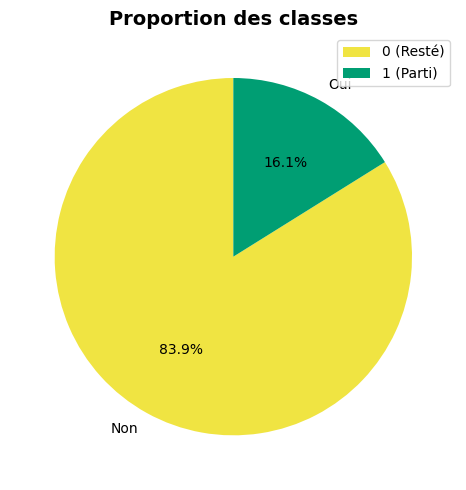


💡 Observation : 16.1% des salariés sont partis de l'entreprise.


In [21]:
fig, axes = plt.subplots(1, 1, figsize=(14, 5))
quitte_oui_non = df_complet['a_quitte_l_entreprise']
quitte_oui = df_complet[quitte_oui_non == 'Oui']
pourcentage_quitte_oui = (len(quitte_oui)/ len(df_complet))*100

# Graphique 2 : Pie chart
colors_pie = ['#F0E442', '#009E73']
quitte_oui_non.value_counts().plot(kind='pie', ax=axes, colors=colors_pie, 
                      autopct='%1.1f%%', startangle=90)
axes.set_title('Proportion des classes', fontsize=14, fontweight='bold')
axes.set_ylabel('')
axes.legend(['0 (Resté)', '1 (Parti)'], loc='upper right')

plt.tight_layout()
plt.show()

print( f"\n💡 Observation : {pourcentage_quitte_oui:.1f}% des salariés sont partis de l'entreprise.")

## 7. Distribution graphique

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('husl')

# Couleurs pour Partis vs Restés
colors = {'Oui': '#f39c12', 'Non': '#3498db'} 

<Figure size 1200x600 with 0 Axes>

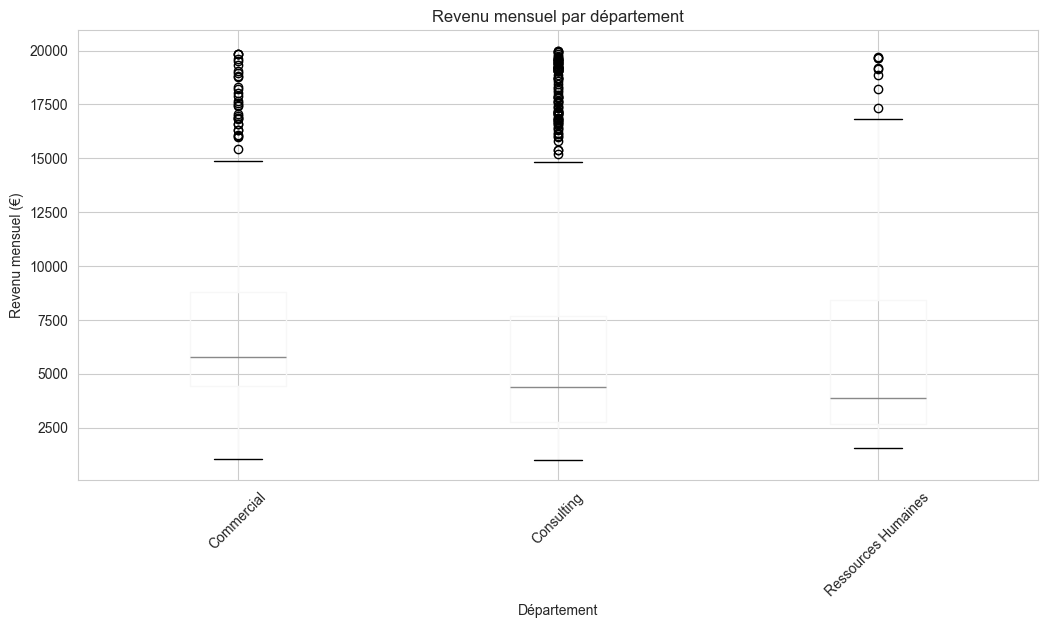

In [34]:
# Boxplot groupé 
plt.figure(figsize=(12, 6))
df_complet.boxplot(column='revenu_mensuel', by='departement', figsize=(12, 6))
plt.title('Revenu mensuel par département')
plt.suptitle('')
plt.xlabel('Département')
plt.ylabel('Revenu mensuel (€)')
plt.xticks(rotation=45)
plt.show()

### 7.1 Salaire Vs Attrition

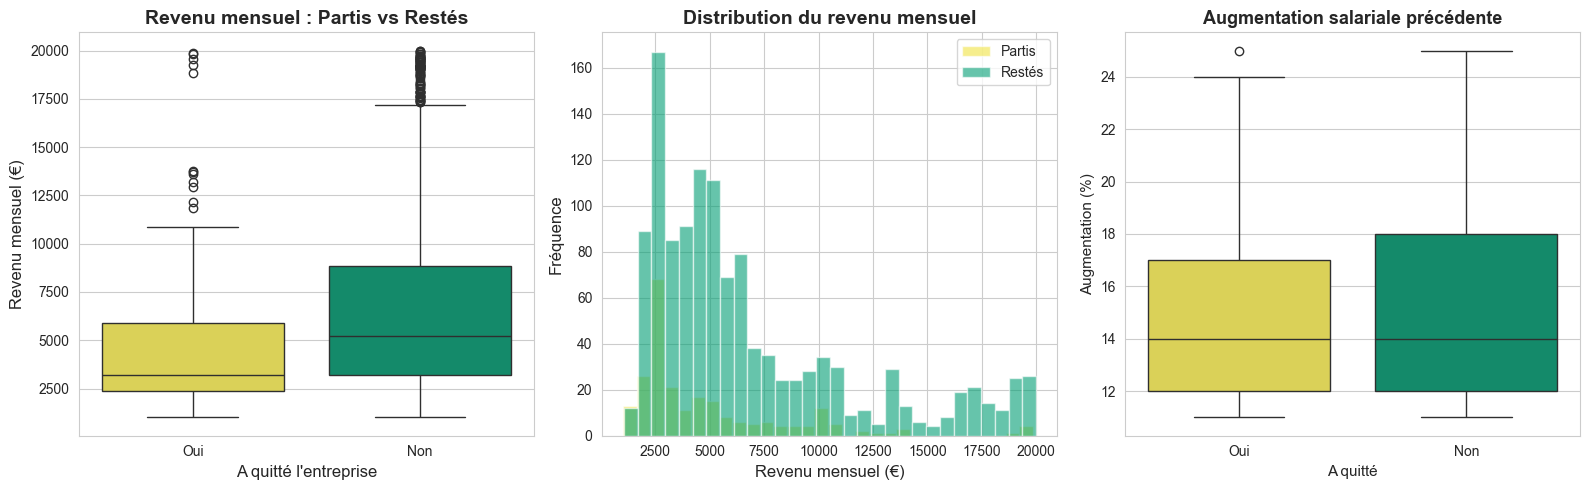


📊 SALAIRE MOYEN :
                         mean  median     std
a_quitte_l_entreprise                        
Non                    6833.0  5204.0  4818.0
Oui                    4787.0  3202.0  3640.0


In [27]:
#Graphique 1 : Revenu mensuel - Partis vs Restés
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Boxplot
sns.boxplot(data=df_complet, x='a_quitte_l_entreprise', y='revenu_mensuel', hue='a_quitte_l_entreprise',
            palette=colors, ax=axes[0])
axes[0].set_title('Revenu mensuel : Partis vs Restés', fontsize=14, fontweight='bold')
axes[0].set_xlabel('A quitté l\'entreprise', fontsize=12)
axes[0].set_ylabel('Revenu mensuel (€)', fontsize=12)

# Histogramme comparatif
df_complet[df_complet['a_quitte_l_entreprise'] == 'Oui']['revenu_mensuel'].hist(
    alpha=0.6, bins=30, label='Partis', color=colors['Oui'], ax=axes[1])
df_complet[df_complet['a_quitte_l_entreprise'] == 'Non']['revenu_mensuel'].hist(
    alpha=0.6, bins=30, label='Restés', color=colors['Non'], ax=axes[1])
axes[1].set_title('Distribution du revenu mensuel', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Revenu mensuel (€)', fontsize=12)
axes[1].set_ylabel('Fréquence', fontsize=12)
axes[1].legend()

# Augmentation salariale précédente
sns.boxplot(data=df_complet, x='a_quitte_l_entreprise', y='augmentation_salaire_precedente', hue='a_quitte_l_entreprise',
            palette=colors, ax=axes[2])
axes[2].set_title('Augmentation salariale précédente', fontsize=13, fontweight='bold')
axes[2].set_xlabel('A quitté', fontsize=11)
axes[2].set_ylabel('Augmentation (%)', fontsize=11)

plt.tight_layout()
plt.show()

# Statistiques comparatives
print("\n📊 SALAIRE MOYEN :")
print(df_complet.groupby('a_quitte_l_entreprise')['revenu_mensuel'].agg(['mean', 'median', 'std']).round(0))

### 7.2 Ancienneté Vs Attrition

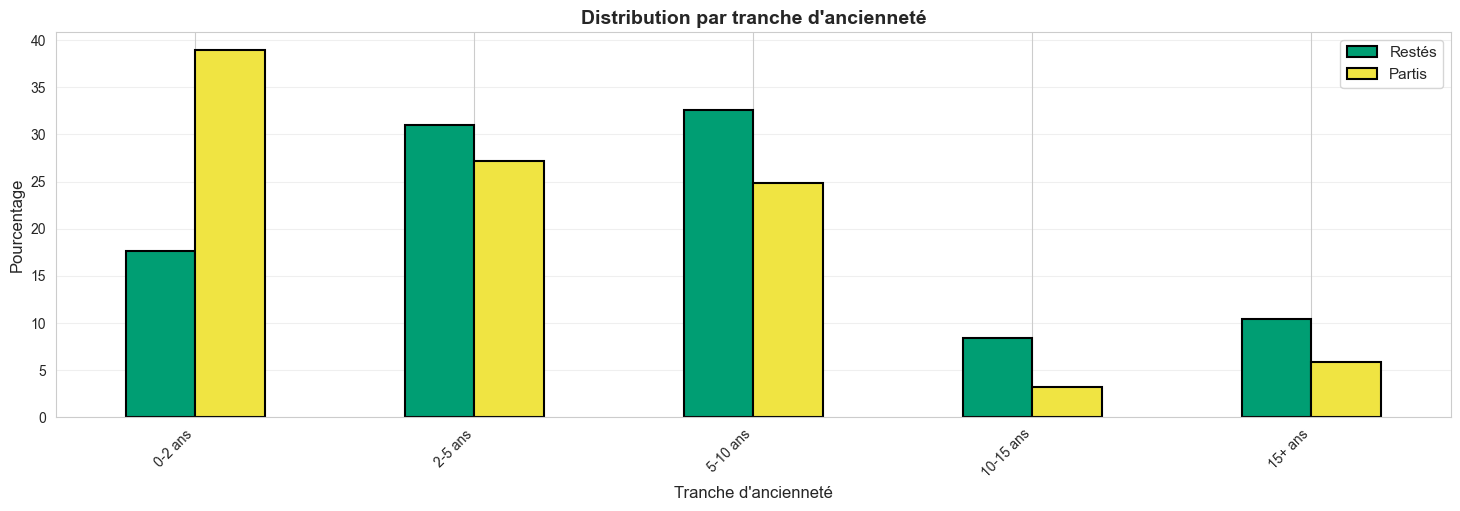

In [28]:
# Graphique qui met en évidence la différence
fig, axes = plt.subplots(figsize=(18, 5))


# 2. HISTOGRAMME empilé par tranches d'ancienneté
bins = [0, 2, 5, 10, 15, 40]
labels = ['0-2 ans', '2-5 ans', '5-10 ans', '10-15 ans', '15+ ans']

df_complet['tranche_anciennete'] = pd.cut(df_complet['annees_dans_l_entreprise'], 
                                            bins=bins, labels=labels)

anciennete_crosstab = pd.crosstab(df_complet['tranche_anciennete'], 
                                   df_complet['a_quitte_l_entreprise'], 
                                   normalize='columns') * 100

anciennete_crosstab.plot(kind='bar', ax=axes, color=[colors['Non'], colors['Oui']], 
                         edgecolor='black', linewidth=1.5)
axes.set_title('Distribution par tranche d\'ancienneté', fontsize=14, fontweight='bold')
axes.set_xlabel('Tranche d\'ancienneté', fontsize=12)
axes.set_ylabel('Pourcentage', fontsize=12)
axes.legend(['Restés', 'Partis'], fontsize=11)
axes.set_xticklabels(labels, rotation=45, ha='right')
axes.grid(axis='y', alpha=0.3)


### 7.3 Satisfaction Vs Attrition

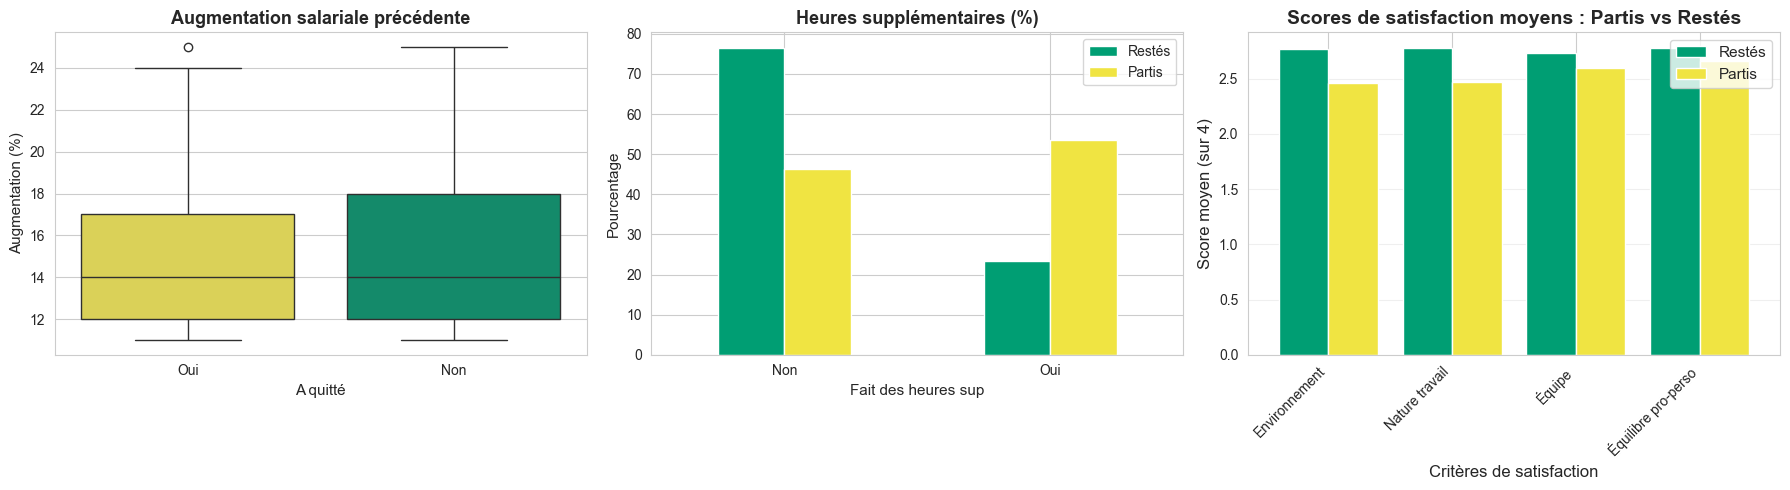

In [29]:
# Graphique 4 : Notes d'évaluation et augmentation salariale
fig, axes = plt.subplots(1, 3, figsize=(18, 5))


# Augmentation salariale précédente
sns.boxplot(data=df_complet, x='a_quitte_l_entreprise', y='augmentation_salaire_precedente', hue='a_quitte_l_entreprise',
            palette=colors, ax=axes[0])
axes[0].set_title('Augmentation salariale précédente', fontsize=13, fontweight='bold')
axes[0].set_xlabel('A quitté', fontsize=11)
axes[0].set_ylabel('Augmentation (%)', fontsize=11)

# Heures supplémentaires
heures_sup = pd.crosstab(df_complet['a_quitte_l_entreprise'], 
                         df_complet['heure_supplementaires'], 
                         normalize='index') * 100
heures_sup.T.plot(kind='bar', ax=axes[1], color=[colors['Non'], colors['Oui']])
axes[1].set_title('Heures supplémentaires (%)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Fait des heures sup', fontsize=11)
axes[1].set_ylabel('Pourcentage', fontsize=11)
axes[1].legend(['Restés', 'Partis'])
axes[1].set_xticklabels(['Non', 'Oui'], rotation=0)

# Graphique 3 : Scores de satisfaction
colonnes_satisfaction = [
    'satisfaction_employee_environnement',
    'satisfaction_employee_nature_travail',
    'satisfaction_employee_equipe',
    'satisfaction_employee_equilibre_pro_perso'
]

# Calculer les moyennes par groupe
satisfaction_moy = df_complet.groupby('a_quitte_l_entreprise')[colonnes_satisfaction].mean()

# Barplot comparatif
satisfaction_moy.T.plot(kind='bar', ax=axes[2], color=[colors['Non'], colors['Oui']], width=0.8)
axes[2].set_title('Scores de satisfaction moyens : Partis vs Restés', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Critères de satisfaction', fontsize=12)
axes[2].set_ylabel('Score moyen (sur 4)', fontsize=12)
axes[2].set_xticklabels(['Environnement', 'Nature travail', 'Équipe', 'Équilibre pro-perso'], rotation=45, ha='right')
axes[2].legend(['Restés', 'Partis'], fontsize=11)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 7.4 Métier Vs Attrition

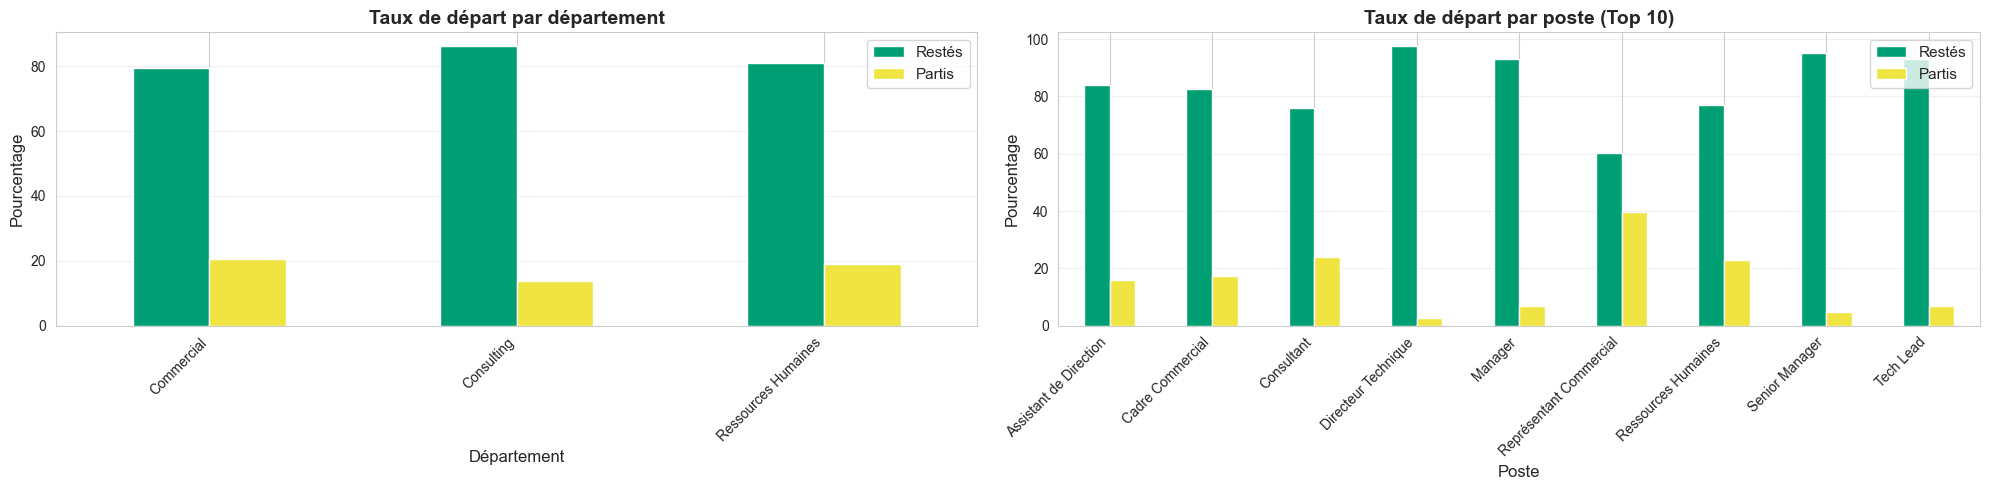

In [30]:
# Graphique 5 : Département et Poste
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Taux de départ par département
dept_attrition = pd.crosstab(df_complet['departement'], 
                             df_complet['a_quitte_l_entreprise'], 
                             normalize='index') * 100
dept_attrition.plot(kind='bar', stacked=False, ax=axes[0], color=[colors['Non'], colors['Oui']])
axes[0].set_title('Taux de départ par département', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Département', fontsize=12)
axes[0].set_ylabel('Pourcentage', fontsize=12)
axes[0].legend(['Restés', 'Partis'], fontsize=11)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Taux de départ par poste (top 10)
top_postes = df_complet['poste'].value_counts().head(10).index
df_top_postes = df_complet[df_complet['poste'].isin(top_postes)]
poste_attrition = pd.crosstab(df_top_postes['poste'], 
                              df_top_postes['a_quitte_l_entreprise'], 
                              normalize='index') * 100
poste_attrition.plot(kind='bar', stacked=False, ax=axes[1], color=[colors['Non'], colors['Oui']])
axes[1].set_title('Taux de départ par poste (Top 10)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Poste', fontsize=12)
axes[1].set_ylabel('Pourcentage', fontsize=12)
axes[1].legend(['Restés', 'Partis'], fontsize=11)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Sauvegarde du Dataset

In [31]:
# Sauvegarder le DataFrame fusionné pour les analyses futures
df_complet.to_csv('data_complete.csv', index=False)
print("✅ DataFrame complet sauvegardé dans 'data_complete.csv'")

✅ DataFrame complet sauvegardé dans 'data_complete.csv'


In [38]:
df_complet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   id_employee                                1470 non-null   int64   
 1   age                                        1470 non-null   int64   
 2   genre                                      1470 non-null   object  
 3   revenu_mensuel                             1470 non-null   int64   
 4   statut_marital                             1470 non-null   object  
 5   departement                                1470 non-null   object  
 6   poste                                      1470 non-null   object  
 7   nombre_experiences_precedentes             1470 non-null   int64   
 8   nombre_heures_travailless                  1470 non-null   int64   
 9   annee_experience_totale                    1470 non-null   int64   
 10  annees_dans_